Petersin, Avery: 95/100
1.) No figure caption for exercise 3

# <font color = "red">Exercise 1:</font>

Create two 4x4 matrices and use Python and Numpy to perform a matrix multiplication. Confirm your result and show your work.

In [25]:
import numpy as np
x = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
y = np.array([[1,2,3,4],[1,2,3,4],[1,2,3,4],[1,2,3,4]])
print('x=')
print x
print('y=')
print y
print('x*y=')
print np.dot(x,y)

x=
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
y=
[[1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]
 [1 2 3 4]]
x*y=
[[10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]
 [10 20 30 40]]


The first element of the product matrix is 10. And it is true that 1x1 + 1x2 + 1x3 + 1x4 = 10, so that checks out. The second row and second column element in the product matrix is 20. And we can check that 2x1 + 2x2 + 2x3 + 2x4 does indeed equal 20. The last element, 40, checks out as 4x1 + 4x2 + 4x3 + 4x4 = 40.

# <font color = "red">Exercise 2:</font>

Write code to find <i>k</i> such that <b>fn(x)</b> converges (i.e., that by increasing <i>k</i>, the result no longer changes). 

In [26]:
import math
pi = 3.141592653
def fn(x,y):
    f = 1.0
    for k in range(1, y):
        f += (-1)**k*x**(2*k)/math.factorial(2.*k)
    return f

x = pi/2.
y = 1
while fn(x,y+1)!=fn(x,y):
    y+=1
print 'k =', y+1, 'for x = pi/2'

k = 16 for x = pi/2


# <font color = "red">Exercise 3:</font>
 
Read in the image called <i>andromeda_rot.fits</i>. Make a side-by-side 2-panel figure. The left panel should show the 2D representation of the pixels along with isocontours. The right panel should show a 2D Gaussian fit to the pixel intensities (hint: go to the SciPy cookbook and search for 2D Gaussian). Make the labels be in arcseconds (not pixels). In order to switch from pixels to arcseonds, you will need to extract the image tick values and use the known fact that every pixel is 1.7 arcseconds (the resolution of the instrument).

**Extra Credit**: Re-do the Gaussian fit, but now solve for the rotation angle of the 2D Gaussian (i.e., the covariance).

Filename: andromeda_rot.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      53   (510, 340)   int16 (rescales to uint16)   


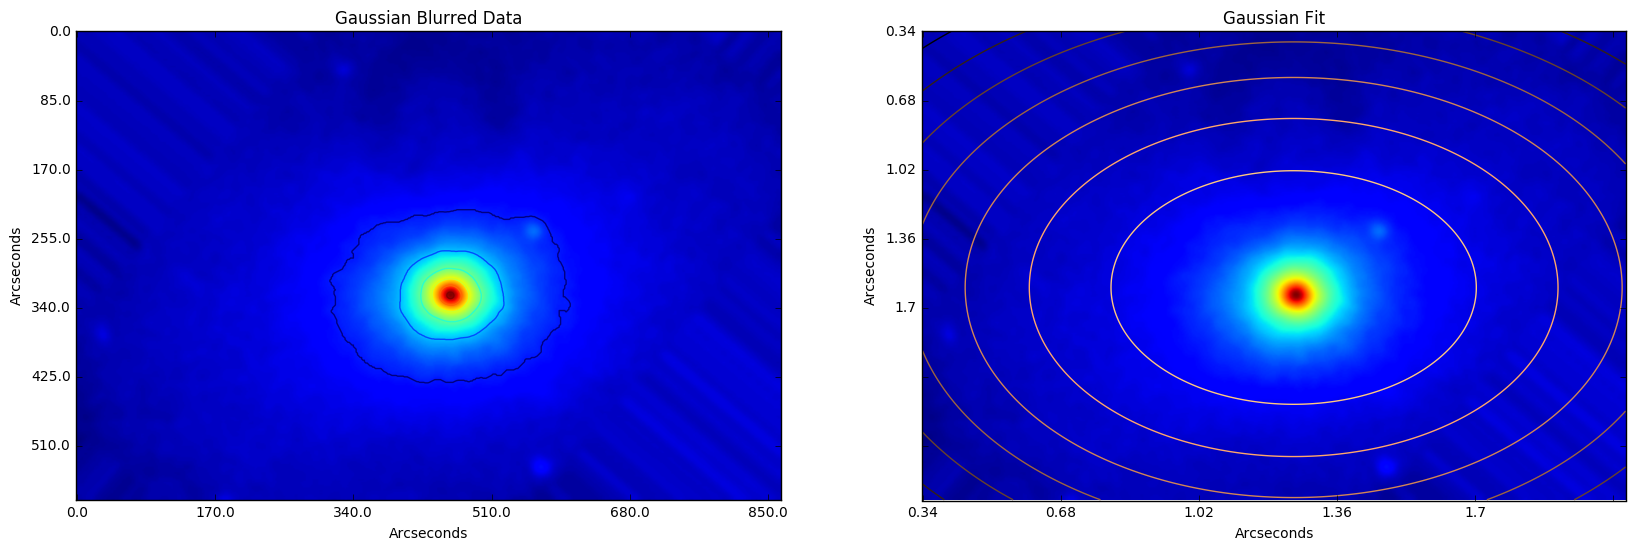

In [27]:
import scipy as sp
from scipy.integrate import quad
from numpy import *
from scipy import optimize
import sys
from scipy.optimize import curve_fit
from astropy.io import fits
from scipy import ndimage

def gaussian(height, center_x, center_y, width_x, width_y):
    """Returns a gaussian function with the given parameters"""
    width_x = float(width_x)
    width_y = float(width_y)
    return lambda x,y: height*exp(
                -(((center_x-x)/width_x)**2+((center_y-y)/width_y)**2)/2)

def moments(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution by calculating its
    moments """
    total = data.sum()
    X, Y = indices(data.shape)
    x = (X*data).sum()/total
    y = (Y*data).sum()/total
    col = data[:, int(y)]
    width_x = sqrt(abs((arange(col.size)-y)**2*col).sum()/col.sum())
    row = data[int(x), :]
    width_y = sqrt(abs((arange(row.size)-x)**2*row).sum()/row.sum())
    height = data.max()
    return height, x, y, width_x, width_y

def fitgaussian(data):
    """Returns (height, x, y, width_x, width_y)
    the gaussian parameters of a 2D distribution found by a fit"""
    params = moments(data)
    errorfunction = lambda p: ravel(gaussian(*p)(*indices(data.shape)) -
                                 data)
    p, success = optimize.leastsq(errorfunction, params)
    return p

from astropy.io import fits
from pylab import *
sys.path.append(root)
image = fits.info('andromeda_rot.fits')
image
data = fits.getdata('andromeda_rot.fits')
blurred_data = ndimage.gaussian_filter(data,sigma=3)

f, (Im2, Im1) = plt.subplots(1, 2, figsize=(20,10))

params = fitgaussian(blurred_data)
fit = gaussian(*params)

Im1.set_title('Gaussian Fit')
Im1.set_xlabel('Arcseconds')
Im1.set_ylabel('Arcseconds')

yticks = Im1.get_yticks().tolist()
yticks = [1.7*x for x in yticks]
Im1.set_yticklabels(yticks)

xticks = Im1.get_xticks().tolist()
xticks = [1.7*x for x in xticks]
Im1.set_xticklabels(xticks)

Im1.imshow(blurred_data)
Im1.contour(fit(*indices(blurred_data.shape)), cmap=cm.copper)
ax = gca()
(height, x, y, width_x, width_y) = params
Im2.imshow(blurred_data)
Im2.contour(blurred_data)

Im2.set_title('Gaussian Blurred Data')
Im2.set_xlabel('Arcseconds')
Im2.set_ylabel('Arcseconds')

yticks = Im2.get_yticks().tolist()
yticks = [1.7*x for x in yticks]
Im2.set_yticklabels(yticks)

xticks = Im2.get_xticks().tolist()
xticks = [1.7*x for x in xticks]
Im2.set_xticklabels(xticks)

# Git and BitBucket

Imagine that you've just spent three weeks writing a crucial piece of software for your research and your laptop suddenly dies on you. Fortunately, you were savvy enough to make (occasional) backups but then you realize that they are all based on your old design and that none of them incorporate the radical revisioning you dreamt up two nights ago at 3 am and have spent the last 40 hours implementing, surviving only on adrenaline, cold pizza and thick coffee. It's OK, though, I'm sure that you'll remember all those changes...

Version control systems exist to manage software development, keeping track of (commented) changes you make to a code base and allowing you to backtrack, branch off, and refactor to your heart's content (assuming, of course, that you remember to keep the local copy synched with that in the master repository). There are many such systems out there, for example,  <a href="http://subversion.apache.org">Subversion (SVN)</a>, <a href="http://mercurial.selenic.com">Mercurial</a>, and <a href="http://bazaar.canonical.com">Bazaar</a>, all with their own advantages and idiosyncracies, but the one we will talk about here (and encourage you to use this week) is <b>Git</b>. Although you can run your own local git repository (amd you may want to do so at your home institution), we're going to make use of <i>GitHub</i>, which is web-based (and hosted) repository that has a nice browser interface.

So the first thing you'll need to do is install the appropriate <i>git</i> package for your operating system from <a href="https://git-scm.com/downloads">here</a> (assuming it's not already installed). The second thing to do is register for an account on at <a href="http://bitbucket.com">BitBucket</a>. The Professor has created a team repository to use for this class. Send the Professor an email with your BitBucket username and they will add you to the team as a user. <b> Make sure you register using your Michigan email address!.<b>

After you have done so, go to <a href="http://bitbucket.com">BitBucket</a> (you may have to login) and click the tiny book icon next to your username. On the right-hand side you should see a link to <i>TEAMS</i> that you contribute to. Select the one with Astro361Fall2015 in the name. The professor will place files here for you to access.

You need to create your own repository to store your code. Make one new code repository called "Introduction".

Although BitBucket will serve as the master location for your code, the bulk of any development will happen on your machine and we mirror the repository you just created (let's assume you named it "introduction") as a local directory:

<code>> mkdir /some/directory/introduction</code>

Now you'll need to switch to this directory and initialize it for git:

<code>> cd /some/directory/introduction</code>

<code>> git init</code><br/>
<code>Initialized empty Git repository in /some/directory/introduction/.git/</code>

Now, specify the remote location of your BitBucket repository (replace username with your BitBucket username and the word "introduction" with your specific repository):
<br><code>git remote add origin https://username@bitbucket.org/introduction </code><br>

And there you go, you're ready to start writing your code. Obviously at some point, you're going to want to sync the local repository with the master one (otherwise why are we bothering with this). This is a three-stage process (and if you can remember 'add-commit-push' then it is straightforward). Firstly, you need to tell git which files in your local directory you want in the master repository - you may decide initially that you want everything in it but you'll soon find that you end up with all sorts of extra stuff in the local repository that you don't need in the master, such as temporary files for testing, random notes, coffee shop receipts, etc. So for each file that you want to <b>add</b>:

<code>> git add some_algorithm.py</code>

Next you need to tell git to take a snapshot of the code you've just told it about. It's at this point that you also tell git something about this particular version of the code, for example, whether it's an initial version or which bug this change fixes or new feature it adds. These comments are visible on the public view of your code on the GitHub site so it's a good idea to be as informative as possible, otherwise:

In [28]:
Image(filename='git_commit.png') 

NameError: name 'Image' is not defined

As the cartoon shows, the command to do this is <b>commit</b> with a <b>-m</b> flag to add an inline comment. If you do not specify the flag then git will take you to a temporary file for you to add commit messages so it's easiest to just add them as inline text:

<code>> git commit -m "Amazing new update to my code!"</code>

Finally, you need to <b>push</b> this all up to BitBucket:

<code>>git push origin master</code>

and the two repositories are now in sync (at least as far as the code you care about is concerned). If at any point you want to check which files are in the repository, which changes still need to be committed (and which branch of the repository you’re currently working on) then you can use:

<code>> git status -v</code>

Let's say now that you want a local copy of one of your colleague's codes that she put into your repository (because she implemented a fabulous algorithm that you want to <strike>steal</strike> also use) then you can check this out with:

<code>> git checkout fastcode</code>

assuming that it's the branch of your repository called "fastcode" and

<code>>git clone http://bitbucket.com/otherProject.git</code>

if it's in an entirely different repository (you can get the URL for this from the BitBucket web page for this repository.

There are (a lot of) other git commands to manage branches, etc. and the BitBucket repository has material on all of these but you  always check out the syntax of a particular one locally with:

<code>> git help <i>command-name</i></code>

# <font color = "red" >Exercise 4:</font>

Create a new iPython notebook that contains the above three exercises. Check this code into your BitBucket repository (called Introduction). Give the Professor access to this repo (**username chrism71**). The Professor will check out your code and run it.

# <font color = "red">Exercise 5:</font>

Discuss how this tutorial enabled you to meet the 6 defined learning goals. For each goal, provide your own insight as to why it is important for modern astronomy.

1. This tutorial guided me through some of the basics of Python and using GIT repositories, both of which are very important for all of the big data that drive science in modern times. Computers and programming allow for advanced calculations and simulations and GIT repositories make collaboration and data sharing extremely easy.
2. Manipulating numerical data as vectors and n-dimensional matrices are essential for converting physics to computer code, and this tutorial walked us through using them in Python by creating vector objects and matrices and then performing operations on them.
3. Figures are important for displaying your data to other scientist and the general public, and the last few examples and exercise 3 taught you how to manipulate these figures so the data represented contains useful information that is formatted in an appropriate way.
4. Reading in and manipulating tabular data is useful when you're using large data sets like is common in modern astronomy.
5. Loops allow for many advanced mathematics and other operations to be done your code, for example integration or finding where a function converges as done in this tutorial. Functions are also useful for simplifying code and doing a specific task multiple times. This is important for doing mathematics in your code.
6. We were able to read in some data from an astronomical image and make plots of the pixel intensity and fit as gaussian distribution to the data in the tutorial, hence making the data useful that use simply displaying the pixel data.

# Learning Goals for this Lab

1. Introduce yourself to the Python language, the use of a notebook, and the use of GIT repositories.
2. Learn how to make and manipulate numerical data as vectors and n-dimensional matrices.
3. Learn how to make, manipulate, and annotate figures.
4. Learn how to read in and manipulate tabular data.
5. Learn how to define functions and to use simple loops in your programming.
6. Learn how to read in and manipulate astronomical image data.